# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

/Users/philipp/Python/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [2]:
# (1) # Your Code goes here:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path, delimiter = ',')
print("the dataset has {} instances and {} attributes" .format(news_raw.shape[0], news_raw.shape[1]))

the dataset has 2129 instances and 521 attributes


In [3]:
news_raw.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


In [4]:
news_raw.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


(2) ***Your answer goes here:***

The dataset has 2129 instances and 521 attributes. The newsgroup documents are represented as bag of words. Every attribute contains the count of the particular word it is representing. The dataset is numerical and discrete. In the describtion we can see that compared to the 25th, 50th and 75th percentile the maximum of the attributes is very high (around 600, probably outliers).

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [62]:
# (1) # Your Code goes here:
news_raw.columns[:100]

Index(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens', 'w6_dwyer',
       'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home', 'w11_buying',
       'w12_internet', 'w13_slots', 'w14_compatible', 'w15_transfer',
       'w16_baltimore', 'w17_mean', 'w18_person', 'w19_performance',
       'w20_support', 'w21_tor', 'w22_gm', 'w23_mouse', 'w24_base',
       'w25_population', 'w26_bob', 'w27_set', 'w28_it', 'w29_earth',
       'w30_faith', 'w31_steve', 'w32_caps', 'w33_printer', 'w34_east',
       'w35_cable', 'w36_adapter', 'w37_mss', 'w38_catcher', 'w39_bullpen',
       'w40_obp', 'w41_innocent', 'w42_european', 'w43_angeles',
       'w44_settings', 'w45_words', 'w46_rit', 'w47_shots', 'w48_ports',
       'w49_vga', 'w50_coverage', 'w51_jumpers', 'w52_bases', 'w53_sea',
       'w54_pts', 'w55_behavior', 'w56_domi', 'w57_sabres', 'w58_yzerman',
       'w59_messier', 'w60_goalies', 'w61_hawks', 'w62_our', 'w63_sx',
       'w64_view', 'w65_hitters', 'w66_richard', 'w67_point', 'w68_n

(2) ***Your answer goes here:***

The attribute names consist of the word number 'w[number]_' and the word it is representing. Most of the words seem specialized on the broad topics: atheism, computer-hardware and sports.

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset **A**. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 

1. [Text] Mention anything peculiar you observe in the Data.

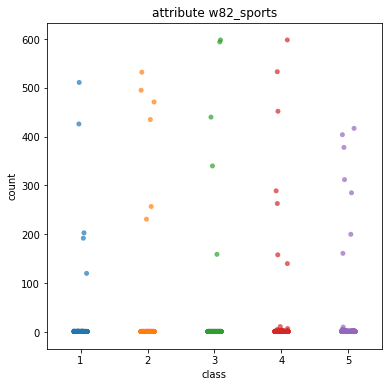

In [6]:
# (1) # Your Code goes here:
plt.figure(figsize=(6,6))
ax = sns.stripplot(x='class', y='w82_sports', data=news_raw, jitter=True, alpha=0.7)
plt.title("attribute w82_sports")
plt.xlabel("class")
plt.ylabel("count")
plt.show()

(2) ***Your answer goes here:***

It seems that there are a lot of documents (instances) with none or just a few occurrences of the word 'sport'. On the other hand we can see few documents that have 100 until 600 occurrences of the word 'sport'. These data points are outliers.

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

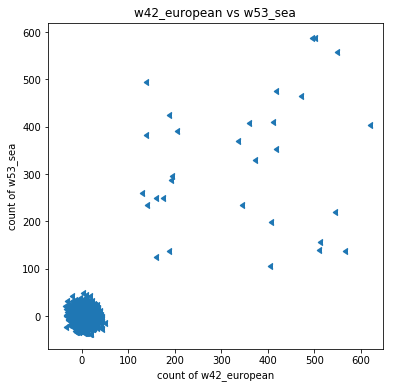

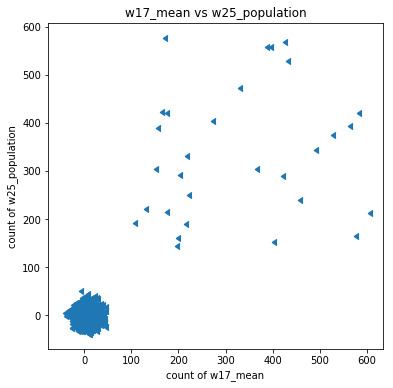

In [7]:
# (1) # Your Code goes here:

# plot w42_european vs w53_sea
plt.figure(figsize=(6,6))
scatter_jitter(news_raw['w42_european'].values, news_raw['w53_sea'].values, jitter=0.3)
plt.title("w42_european vs w53_sea")
plt.xlabel("count of w42_european")
plt.ylabel("count of w53_sea")
plt.show()

# plot w42_european vs w53_sea
plt.figure(figsize=(6,6))
scatter_jitter(news_raw['w17_mean'].values, news_raw['w25_population'].values, jitter=0.3)
plt.title("w17_mean vs w25_population")
plt.xlabel("count of w17_mean")
plt.ylabel("count of w25_population")
plt.show()

(2) ***Your answer goes here:***

This plots show very clearly that the attributes tend to have small values (the dense culmination around 0 and small counts) and that the outliers usually contain over 100 counts. Another posibility is to use a box plot or a histogram, in both you can see the distribution of the data and find the outliers.

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of points in the cleaned dataset, and the number rejected as outliers and comment on the result

(1) ***Your answer goes here:***

The outliers, have a high frequency in all attributes. The maximum word count for these instences is between 597 and 600, hence it is suefficient to set the treshhold on 500 to not exclude the instances that have a high word count in one attribute (for example 'w96_of' or 'w194_that').

the dataset with outliers: 2129 instances
the cleaned dataset: 2099 instances
through cleaning removed: 30 instances


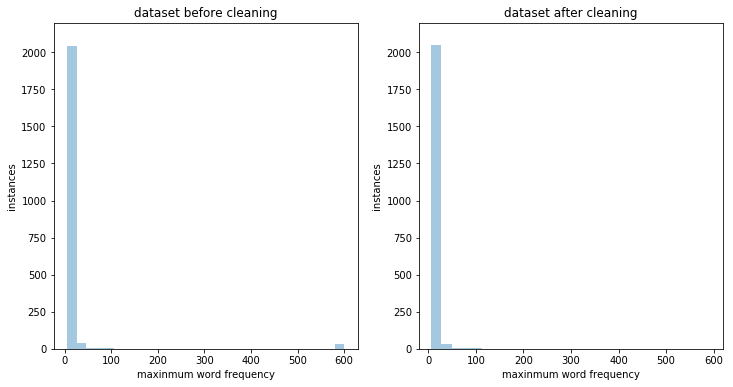

In [90]:
# (2) # Your Code goes here:

# deep copy the dataset
news_clean = news_raw.copy()

# drop all instances with a word frequency of 500 or more
news_clean = news_clean[news_clean < 500]
news_clean.dropna(inplace=True)

# trasform data for plotting (get the maximum word frequency per instance)
i_max_raw = news_raw.max(axis=1)
i_max_clean = news_clean.max(axis=1)

# plot histograms
f, axes = plt.subplots(1, 2, figsize=(12,6))
sns.distplot(i_max_raw, kde=False, bins=30, ax=axes[0])
#axes[0].set_yscale('log')
axes[0].set(title="dataset before cleaning")
axes[0].set(xlabel="maxinmum word frequency")
axes[0].set(ylabel="instances")
axes[0].set(ylim=(0,2200))
sns.distplot(i_max_clean, kde=False, bins=15, ax=axes[1])
#axes[1].set_yscale('log')
axes[1].set(title="dataset after cleaning")
axes[1].set(xlabel="maxinmum word frequency")
axes[1].set(ylabel="instances")
axes[1].set(xlim=(-20,620))
axes[1].set(ylim=(0,2200))
plt.show

print("the dataset with outliers: {} instances" .format(news_raw.shape[0]))
print("the cleaned dataset: {} instances" .format(news_clean.shape[0]))
print("through cleaning removed: {} instances" .format(news_raw.shape[0] - news_clean.shape[0]))

#news_outl = news_outl[news_outl.max(axis=1) > 500]
#print("\n \n")
#print(news_outl)

(3) ***Your answer goes here:***

The original dataset with outliers has 2129 instances, the cleaned dataset contains 2099 instances, so 30 instances were removed.  

# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

/Users/philipp/Python/anaconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


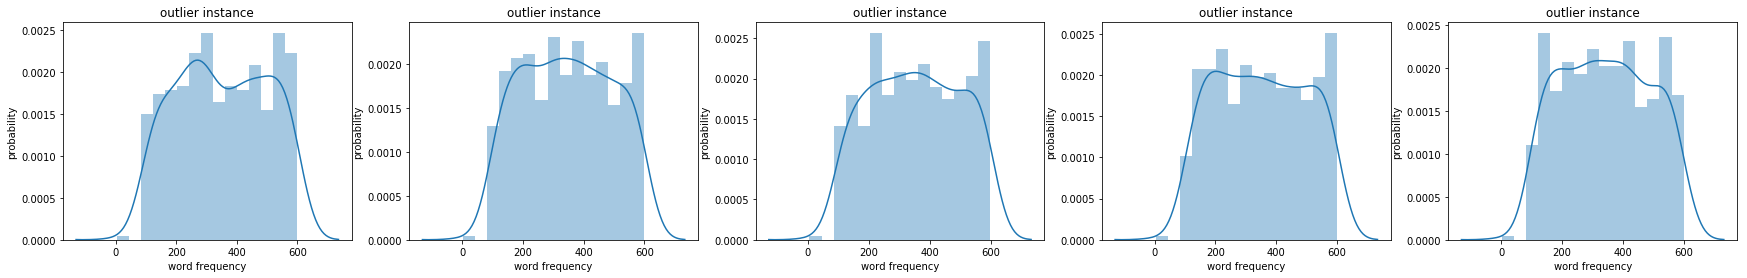

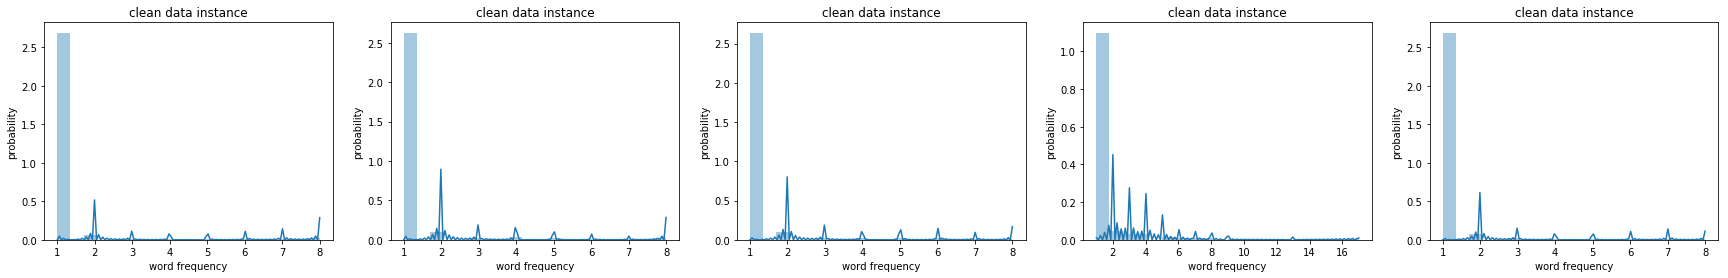

In [105]:
# (1) # Your Code goes here:

# create outlier dataset
news_outl = news_raw.copy()
news_outl = news_outl[news_outl.max(axis=1) > 500]

# plot outliers instances
f, axes = plt.subplots(1, 5, figsize=(30,4))
for i in np.arange(5):
    sns.distplot(news_outl.iloc[i], bins=15, ax=axes[i])
    axes[i].set(title="outlier instance")
    axes[i].set(xlabel="word frequency")
    axes[i].set(ylabel="probability")

# plot cleand data instances
f, axes = plt.subplots(1, 5, figsize=(30,4))
for i in np.arange(5):
    sns.distplot(news_clean.iloc[i], bins=20, ax=axes[i])
    axes[i].set(title="clean data instance")
    axes[i].set(xlabel="word frequency")
    axes[i].set(ylabel="probability")

(2) ***Your answer goes here:***

The distribution of the outlier instances has a equal distribution (rangeing from 100 until 600 word frequency), while 
the distribution of the clean data instances is totaly diffrent and has mostly none or very few word occurencies. 

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [17]:
# Your Code goes here:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(data_path, delimiter = ',')
print("the dataset news_train has {} instances and {} attributes" .format(news_train.shape[0], news_train.shape[1]))
print("the dataset news_test has {} instances and {} attributes" .format(news_test.shape[0], news_test.shape[1]))

the dataset news_train has 2099 instances and 521 attributes
the dataset news_test has 128 instances and 521 attributes


In [18]:
news_train.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


In [19]:
news_test.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***

The Naive Bayes model has the assumption that the attributes are conditionally independent form each other, given the value of the class variable. 
If we wouldnt consider the independence assumption between the attributes, we would have a to calculate the probability in high dimensions and the frequencies of same instances would be probably 0.

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset A. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

<function matplotlib.pyplot.show(*args, **kw)>

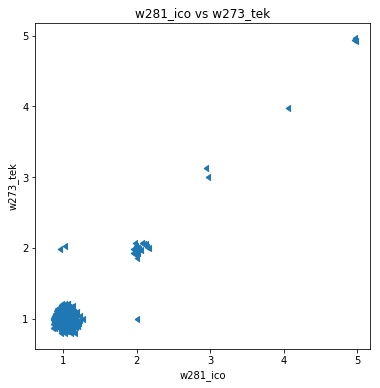

In [20]:
# (1) # Your Code goes here:
plt.figure(figsize=(6,6))
scatter_jitter(news_train['w281_ico'].values, news_train['w273_tek'].values, jitter=0.3)
plt.title("w281_ico vs w273_tek")
plt.xlabel('w281_ico')
plt.ylabel('w273_tek')
plt.show

(2) ***Your answer goes here:***

This two attributes have high corraliation. They occure in almost all documents with the same frequency. 
The cooralition between this two attributes has a impact on the validity of the Naive Bayes assumption, since the assumption is independence. However Naive Bayes classifier seems pretty robust against this corraliating attributes.

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***

A reasonable baseline to predict always the most frequent class (the one with the highest prior probability).

In [44]:
# (2) # Your Code goes here:

# find most frequent class
fequ_class = news_train['class'].mode()[0]

# create predictions (predict always most frequent class)
y_baseline = np.ones(news_train.shape[0]) * fequ_class

# calculate score for baseline
ca_baseline = accuracy_score(news_train['class'], y_baseline)

print("the classification accuracy on the training data for the baseline: {:.3f}" .format(ca_baseline))

the classification accuracy on the training data for the baseline: 0.213


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [46]:
# (1) # Your Code goes here:

# seperate features from lables
X_train = news_train.drop('class', axis=1)
y_train = news_train['class']

# fit Gaussian Naive Bayes model
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

the classification accuracy on the training data for the Gaussian Naive Bayes: 0.878


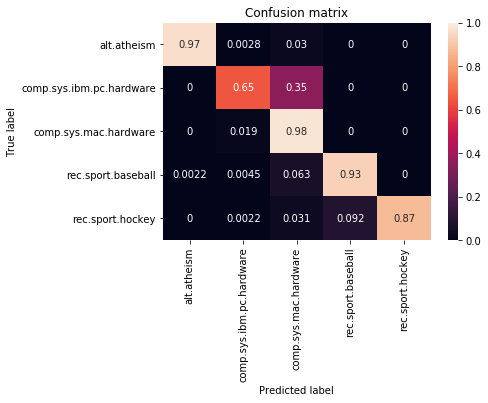

In [50]:
# (2) # Your Code goes here:

# plot confusion matrix is taken from lab
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# calculate classification accuracy
y_pred = clf.predict(X_train)
ca = clf.score(X_train, y_train)
print("the classification accuracy on the training data for the Gaussian Naive Bayes: {:.3f}" .format(ca))

# calculate confiusion matrix
cm = sklearn.metrics.confusion_matrix(y_train,clf.predict(X_train))
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plot confusion matrix
plot_confusion_matrix(cm_norm, classes=['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.sport.baseball', 'rec.sport.hockey'])

(3) ***Your answer goes here:***

Our model predicts 87.8% of the training instances accuretly. This compared to the baseline model with 21.3% correctly classified instances is a huge improvment. 
The classification accuracy is a reasonable metric for this dataset, because the classes relativley evenly distributed and we do not get a high classification accuracy just because one class has a higher occurrence.

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***

With a classification accuracy of 0.878, I expected few misclassifications. The confusion matrix supports that claim. The first class 'alt.atheism' is classified very accurately with 97%. Probably because it is not related to the other topics and thus has aparenty few common words with the other topics. The classes 'comp.sys.ibm.pc.hardware' and 'comp.sys.mac.hardware' are similar topics and share possibly common words. That is why 35% of the instances of the class 'comp.sys.ibm.pc.hardware' are misclassified, although instances of the class 'comp.sys.mac.hardware' are classified correctly. The last two topics are also related (both sports) and we can recognize some misclassifications between those classes.

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with the training data/baseline.

the classification accuracy on the test data for the Gaussian Naive Bayes: 0.820


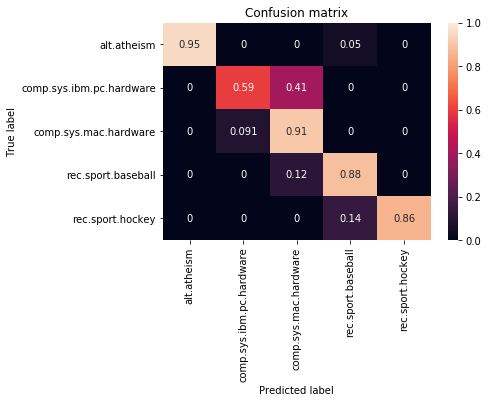

In [52]:
# (1) # Your Code goes here:

# seperate features from lables
X_test = news_test.drop('class', axis=1)
y_test = news_test['class']

# calculate classification accuracy
ca_test = clf.score(X_test, y_test)
print("the classification accuracy on the test data for the Gaussian Naive Bayes: {:.3f}" .format(ca_test))

# calculate confiusion matrix
cm = sklearn.metrics.confusion_matrix(y_test,clf.predict(X_test))
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plot confusion matrix
plot_confusion_matrix(cm_norm, classes=['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.sport.baseball', 'rec.sport.hockey'])

In [53]:
# (2) # Your Code goes here:

# create predictions (predict always most frequent class)
y_baseline_test = np.ones(news_test.shape[0]) * fequ_class

# calculate score for baseline
ca_baseline_test = accuracy_score(news_test['class'], y_baseline_test)

print("the classification accuracy on the test data for the baseline: {:.3f}" .format(ca_baseline_test))

the classification accuracy on the test data for the baseline: 0.203


(3) ***Your answer goes here:***

The classification accuracy on the test data (0.820) is as expected lower than on the training data set (0.878). The confusion matrix  shows, that the class 'alt.atheism' is classified with high accuracy even on the training data, while the other classes show the same patern as on the training data. Compared to the baseline classifier the naive bayes classifier does a pretty good job.

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

the classification accuracy on the test data for the Gaussian Naive Bayes trained with outliers: 0.172


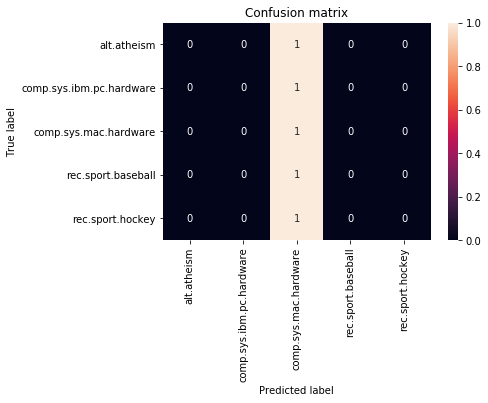

In [57]:
# (1) # Your Code goes here:
from sklearn.naive_bayes import MultinomialNB
# seperate features from lables
X_train = news_raw.drop('class', axis=1)
y_train = news_raw['class']

# fit Gaussian Naive Bayes model
clf = GaussianNB()
#clf = MultinomialNB()
clf.fit(X_train, y_train)

# calculate classification accuracy
y_pred = clf.predict(X_test)
ca = clf.score(X_test, y_test)
print("the classification accuracy on the test data for the Gaussian Naive Bayes trained with outliers: {:.3f}" .format(ca))

# calculate confiusion matrix
cm = sklearn.metrics.confusion_matrix(y_test,clf.predict(X_test))
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plot confusion matrix
plot_confusion_matrix(cm_norm, classes=['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.sport.baseball', 'rec.sport.hockey'])

(2) ***Your answer goes here:***

This model predicts poorly and has only a classification accuracy of 0.172 on the test data. That is a sharp decline form the classification accuracy 0.820 of the model without outliers and even worse than the baseline model from the previous question (that that is based on the cleaned dataset). The classifier does does something similar to the baseline model, but instead of predicting the. most frequent class it is predicting always the 'comp.sys.mac.hardware' class. The poor performance of this model is due to the the few documents with high word counts that cause non gaussian distribution in every attribute.

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***

We can asume a multinomial distribution of the attributes, each attribute with equal probability of occurring.
I would try to fit the data with a multinomial Naive Bayes classifier.